# Networks: structure, evolution & processes
**Internet Analytics - Lab 2**

---

**Group:** *B*

**Names:**

* ASSAYAG Nathaniel
* DUCOURAU Maxime
* JORDAN Clémentine
* TRIOMPHE Achille

---

#### Instructions

*This is a template for part 3 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

---

## 2.3 Epdemics

#### Exercise 2.9: Simulate an epidemic outbreak

Epidemic stopped after 100.75 days | 100.75 days elapsed | 0.1% susceptible, 0.0% infected, 99.9% recovered


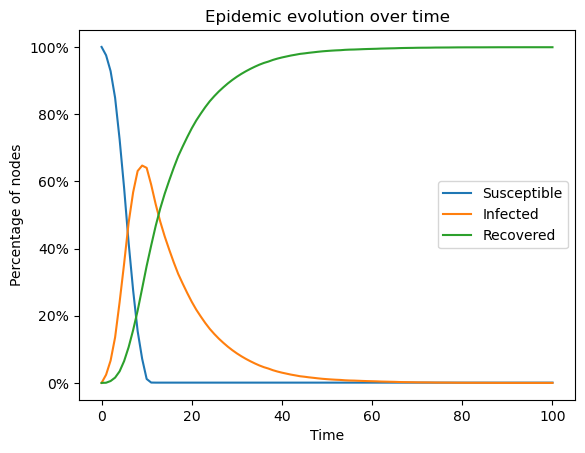

60% of the population is infected at day 8.
60% of the population is recovered at day 15.


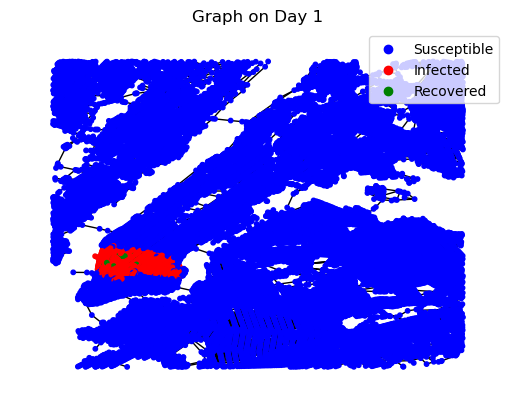

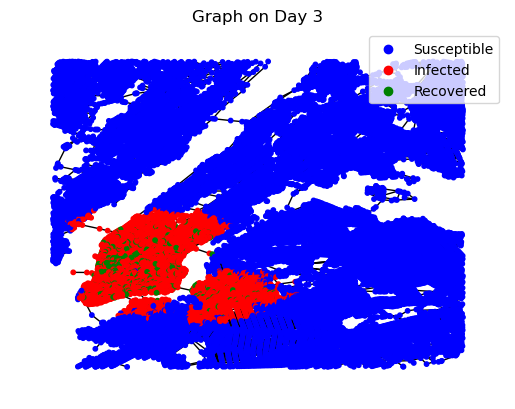

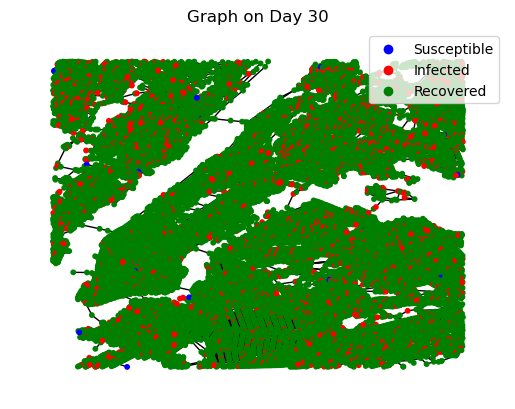

' On day 1, the graph is mostly blue, since the large majority of NY people are still susceptible to the virus. Although, we see\n    some red nodes in "Chelsea - Manhattan", which means that the virus has already started to spread. \n    On day 3, the number of red nodes has increased, and a few green nodes have appeared, which means that some people have already recovered.\n    There is still a large number of blue nodes, which means that the virus has not yet spread to the entire population.\n    On day 30, the number of green nodes is above 80%, which means that a large number of people have already recovered. The number of red nodes \n    has decreased, and less people are infected because of the majority of recovered people. Blue nodes are almost impossible to find on the \n    graph, which means that the virus has almost already spread to the entire population.'

In [63]:
""" 2.9.1: Simulation """ 

import epidemics_helper, networkx, json

with open('../data/nyc_augmented_network.json') as file:
    data = json.load(file)
    G = networkx.readwrite.json_graph.node_link_graph(data)

## Parameters: 
beta = 10.0
gamma = 0.1
max_time = 100.0

sir = epidemics_helper.SimulationSIR(G, beta, gamma)
sir.launch_epidemic(source=23654, max_time=max_time)

""" 2.9.2: Plotting the epidemic curve"""

import numpy as np, matplotlib.pyplot as plt, matplotlib.ticker as ticker

inf_times = sir.inf_time
rec_times = sir.rec_time



s_percentage = np.zeros(int(max_time + 1))
i_percentage = np.zeros(int(max_time + 1))
r_percentage = np.zeros(int(max_time + 1))

for time in range(int(max_time + 1)):

    nodes_number = G.number_of_nodes()

    s_percentage[time] = len([node for node in G.nodes() if sir.inf_time[node] > time and sir.rec_time[node] > time]) / nodes_number
    i_percentage[time] = len([node for node in G.nodes() if sir.inf_time[node] <= time and sir.rec_time[node] > time]) / nodes_number
    r_percentage[time] = len([node for node in G.nodes() if sir.rec_time[node] <= time]) / nodes_number

plt.plot(np.arange(max_time + 1), s_percentage, label='Susceptible')
plt.plot(np.arange(max_time + 1), i_percentage, label='Infected')
plt.plot(np.arange(max_time + 1), r_percentage, label='Recovered')
plt.xlabel('Time')
plt.ylabel('Percentage of nodes')
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(1.0))
plt.legend()
plt.title('Epidemic evolution over time')
plt.show()

""" 2.9.3: Questions """

for time in range(int(max_time + 1)):
    if i_percentage[time] > 0.6:
        print(f'60% of the population is infected at day {time}.')
        break

for time in range(int(max_time + 1)):
    if r_percentage[time] > 0.6:
        print(f'60% of the population is recovered at day {time}.')
        break

"""2.9.4: Use the coordinates of the nodes to visualize the graph. Show susceptible, infected and
recovered nodes in different colors to differentiate them. How does the graph look like
on day 1? day 3? day 30?"""

node_coordinates = {node['id']: tuple(node['coordinates']) for node in data['nodes']}

def plot_graph(day):
    G_copy = G.copy()
    
    node_colors = []
    for node_id in G_copy.nodes():
        status = sir.get_node_status(node_id, day)
        if status == 0: 
            node_colors.append('blue')
        elif status == 1:
            node_colors.append('red')
        elif status == 2:
            node_colors.append('green')

    networkx.draw(G_copy, pos=node_coordinates, ax=plt.gca(), node_size=10, node_color=node_colors)
    plt.title(f'Graph on Day {day}')
    plt.scatter([], [], c='blue', label='Susceptible')
    plt.scatter([], [], c='red', label='Infected')
    plt.scatter([], [], c='green', label='Recovered')
    plt.legend(loc='upper right')
    plt.show()

for day in [1, 3, 30]:
    plot_graph(day)

""" On day 1, the graph is mostly blue, since the large majority of NY people are still susceptible to the virus. Although, we see
    some red nodes in "Chelsea - Manhattan", which means that the virus has already started to spread. 
    On day 3, the number of red nodes has increased, and a few green nodes have appeared, which means that some people have already recovered.
    There is still a large number of blue nodes, which means that the virus has not yet spread to the entire population.
    On day 30, the number of green nodes is above 80%, which means that a large number of people have already recovered. The number of red nodes 
    has decreased, and less people are infected because of the majority of recovered people. Blue nodes are almost impossible to find on the 
    graph, which means that the virus has almost already spread to the entire population."""


---

### 2.3.1 Stop the apocalypse!

#### Exercise 2.10: Strategy 1

In [70]:
"""2.10: Removing edges at random."""

with open('../data/nyc_augmented_network.json') as file:
    data = json.load(file)
    G = networkx.readwrite.json_graph.node_link_graph(data)

budget = 1000
sim_number = 20
s_percentage = np.zeros(sim_number)
i_percentage = np.zeros(sim_number)
r_percentage = np.zeros(sim_number)
graph_copy = G.copy()
edges = list(graph_copy.edges())
nodes_number = graph_copy.number_of_nodes()

while(budget > 0):
    edge = np.random.choice(len(edges))
    graph_copy.remove_edge(edges[edge][0], edges[edge][1])
    edges.remove(edges[edge])
    budget -= 1

sir = epidemics_helper.SimulationSIR(graph_copy, beta, gamma)

for i in range(sim_number):
    source = np.random.choice(list(graph_copy.nodes()))
    sir.launch_epidemic(source=source, max_time=max_time)

    s_percentage[i] = len([node for node in graph_copy.nodes() if sir.inf_time[node] > 30 and sir.rec_time[node] > 30]) / nodes_number
    i_percentage[i] = len([node for node in graph_copy.nodes() if sir.inf_time[node] <= 30 and sir.rec_time[node] > 30]) / nodes_number
    r_percentage[i] = len([node for node in graph_copy.nodes() if sir.rec_time[node] <= 30]) / nodes_number

print(f'Average percentage of susceptible nodes on day 30: {np.mean(s_percentage) * 100}%')
print(f'Average percentage of infected nodes on day 30: {np.mean(i_percentage) * 100}%')
print(f'Average percentage of recovered nodes on day 30: {np.mean(r_percentage) * 100}%')

"""We clearly see that increasing the budget to 10 000 edges would have a significant impact on the epidemic. The average 
   percentage of susceptible nodes would increase, and the average percentage of recovered nodes would decrease. This is because
   the virus would spread less, because of the lack of edges, as expected."""

Epidemic stopped after 102.27 days | 102.27 days elapsed | 24.1% susceptible, 0.0% infected, 75.9% recovered
Epidemic stopped after 30.25 days | 30.25 days elapsed | 100.0% susceptible, 0.0% infected, 0.0% recovered
Epidemic stopped after 98.01 days | 98.01 days elapsed | 24.1% susceptible, 0.0% infected, 75.9% recovered
Epidemic stopped after 101.82 days | 101.82 days elapsed | 24.1% susceptible, 0.0% infected, 75.9% recovered
Epidemic stopped after 103.04 days | 103.04 days elapsed | 95.5% susceptible, 0.0% infected, 4.5% recovered
Epidemic stopped after 93.08 days | 93.08 days elapsed | 24.1% susceptible, 0.0% infected, 75.9% recovered
Epidemic stopped after 98.44 days | 98.44 days elapsed | 24.2% susceptible, 0.0% infected, 75.8% recovered
Epidemic stopped after 107.46 days | 107.46 days elapsed | 24.2% susceptible, 0.0% infected, 75.8% recovered
Epidemic stopped after 101.34 days | 101.34 days elapsed | 24.1% susceptible, 0.0% infected, 75.9% recovered
Epidemic stopped after 94.90

#### Exercise 2.11: Strategy 2